## Monte Carlo simulation rely's on repeated random sampling to obtain results

In [1]:
#using the Monte Carlo to simulate a portfolio of stocks

In [49]:
pip install --upgrade pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
from pandas_datareader import data as pdr
import yfinance as yf

[*********************100%%**********************]  5 of 5 completed

[0.23803744 0.17922746 0.12325038 0.36126565 0.09821908]


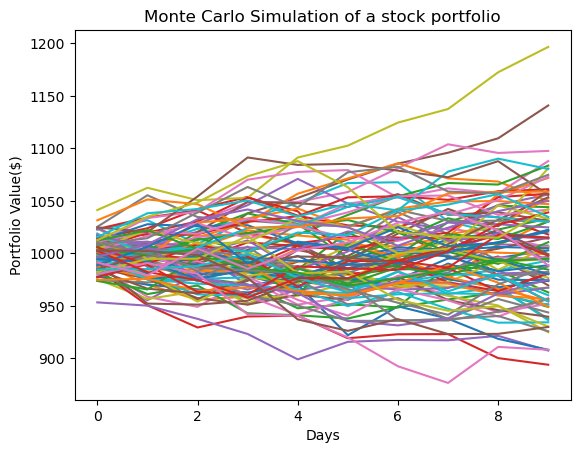

In [51]:
# Function to fetch and process stock data
def get_data(stocks, start, end):
    # Download stock data for the given tickers within the specified date range
    StockData = yf.download(stocks, start=start, end=end)
    # Extract the closing prices
    StockData = StockData['Close']
    # Calculate the daily percentage change (returns)
    returns = StockData.pct_change()
    # Calculate the mean of daily returns for each stock
    meanReturns = returns.mean()
    # Calculate the covariance matrix of daily returns for the stocks
    CovMatrix = returns.cov()
    return meanReturns, CovMatrix

# List of stock tickers
stocklist = ['TSLA', 'AAPL', 'MSFT', 'TSM', 'AMD']
stocks = [stock for stock in stocklist]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

# Fetch mean returns and covariance matrix for the stocks
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# Generate random weights for the portfolio and normalize them so they sum to 1
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

# Monte Carlo simulation settings
mc_simulation = 100  # Number of simulation runs
T = 10  # Number of days for the simulation timeframe

# Generate a matrix of mean returns repeated for each day of the simulation
meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanMatrix = meanMatrix.T  # Transpose to match dimensions for operations later

# Initialize the simulation array to store portfolio values
portfolio_simulation = np.full(shape=(T, mc_simulation), fill_value=0.0)

# Initial portfolio value
initialPortfolio = 1000

# Run the Monte Carlo simulation across the number of specified simulations
for m in range(mc_simulation):
    # Generate random samples from a normal distribution for the simulation period
    Z = np.random.normal(size=(T, len(weights)))
    # Compute the Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(covMatrix)
    # Calculate daily returns for the portfolio
    dailyReturns = meanMatrix + np.inner(L, Z)
    # Compute the cumulative product of returns (compounded return) to get the portfolio value
    portfolio_simulation[:, m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio

# Plot the results of the Monte Carlo simulations
plt.plot(portfolio_simulation)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of a stock portfolio')
plt.show()

                         